## 9. 市场宽度
*对市场内股票数据进行统计，观察样本变化。*

## 目录
1. 什么是市场宽度？
2. 怎么计算市场宽度？
3. 如何用图形展示市场宽度？
4. 如何用市场宽度来编写策略？

## 什么是市场宽度？
市场宽度指标指某一日收盘时，显示某指数组合的股票的上涨数量与下跌数量的比率，有比较准确预测大盘行情的功能。

## 怎么计算市场宽度？

### 1. Advance & Decline Percent (Participation)

$\frac{(Advance-Decline)}{Total}$

### 2. High & Low Percent (Leadership)

$\frac{(High-Low)}{Total}$

### 3. MA50_up & MA50_down Percent (Trend)

$\frac{(MA50_{up}-MA50_{down})}{Total}$

## 如何用图形展示市场宽度？

In [ ]:
#ADP
import pandas as pd
import numpy as np
import pandas_datareader.data as web # 需要安装 pip install pandas_datareader
import datetime

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016,6,30)

StockList = ['0001.hk',  '0002.hk', '0003.hk', '0004.hk', '0006.hk', '0011.hk', '0012.hk', '0016.hk',
             '0017.hk', '0019.hk', '0023.hk', '0027.hk', '0066.hk', '0083.hk', '0101.hk', '0135.hk', '0144.hk',
             '0151.hk', '0175.hk', '0267.hk', '0293.hk', '0386.hk', '0388.hk', '0688.hk', '0700.hk', '0762.hk',
             '0823.hk', '0836.hk', '0867.hk']
dict = {}
for s in StockList:
    stock = web.DataReader(s, 'yahoo', start, end)
    dict[s] = stock

pn = pd.Panel(dict)

print pn

In [1]:
data = pn.minor_xs('Adj Close').pct_change()
cond1 = data>0
cond2 = data<0
data[cond1]=1
data[cond2]=-1

def sum(row):
    row=row[1]
    return row.sum()

data['AD'] = map(sum, data.iterrows())
data['ADP'] = data.AD/len(StockList)
print data.head(10)

NameError: name 'pn' is not defined

In [22]:
#HLP
#Highest
high = pn.minor_xs('High')

def recent_high(series, window=5):
    return series.rolling(window).max()

high_dict = {}
for name, candle in high.iteritems():
    HLP = recent_high(candle)
    high_dict[name] = HLP

highest = pd.DataFrame(high_dict)
cond_h = high>=highest
cond_no = high<highest
highest[cond_h]=1
highest[cond_no]=0

highest = pd.DataFrame(high_dict)
cond_h = high>=highest
cond_no = high<highest
highest[cond_h]=1
highest[cond_no]=0

data['High'] = map(sum, highest.iterrows())

print data.High.head(10)

Date
2016-01-01    0.0
2016-01-04    0.0
2016-01-05    0.0
2016-01-06    0.0
2016-01-07    0.0
2016-01-08    0.0
2016-01-11    0.0
2016-01-12    0.0
2016-01-13    1.0
2016-01-14    2.0
Freq: B, Name: High, dtype: float64


In [23]:
#Lowest
low = pn.minor_xs('Low')

def recent_low(series, window=5):
    return series.rolling(window).min()

low_dict = {}
for name, candle in low.iteritems():
    HLP = recent_low(candle)
    low_dict[name] = HLP
    
lowest = pd.DataFrame(low_dict)
cond_l = low<=lowest
cond_no = low>lowest
lowest[cond_l]=1
lowest[cond_no]=0

data['Low'] = map(sum, lowest.iterrows())
data['HLP'] = (data.High-data.Low)/len(StockList)

print data.HLP.head(10)

Date
2016-01-01    0.000000
2016-01-04    0.000000
2016-01-05    0.000000
2016-01-06    0.000000
2016-01-07   -0.931034
2016-01-08   -0.551724
2016-01-11   -0.896552
2016-01-12   -0.655172
2016-01-13   -0.275862
2016-01-14   -0.655172
Freq: B, Name: HLP, dtype: float64


In [24]:
#MA50
import talib as ta

adj_close = pn.minor_xs('Adj Close')

ma = pd.DataFrame({item: ta.MA(series.values, 5) for item, series in adj_close.iteritems()}, index=adj_close.index)
cond_ma = adj_close>=ma
cond_no = adj_close<ma

ma[cond_ma] = 1
ma[cond_no] = -1

data['MA'] = map(sum, ma.iterrows())
data['MAP'] = data.MA/len(StockList)

result = pd.concat([data.ADP, data.HLP, data.MAP], axis=1)
HSI = web.DataReader('^HSI', 'yahoo', start, end)
result['HSI'] = HSI['Adj Close']

print result

                 ADP       HLP       MAP           HSI
Date                                                  
2016-01-01  0.000000  0.000000  0.000000           NaN
2016-01-04 -0.965517  0.000000  0.000000  21327.119141
2016-01-05  0.000000  0.000000  0.000000  21188.720703
2016-01-06 -0.689655  0.000000  0.000000  20980.810547
2016-01-07 -1.000000 -0.931034 -1.000000  20333.339844
2016-01-08 -0.172414 -0.551724 -1.000000  20453.710938
2016-01-11 -1.000000 -0.896552 -1.000000  19888.500000
2016-01-12 -0.689655 -0.655172 -1.000000  19711.759766
2016-01-13  0.551724 -0.275862 -0.517241  19934.880859
2016-01-14 -0.413793 -0.655172 -0.517241  19817.410156
2016-01-15 -0.758621 -0.448276 -0.655172  19520.769531
2016-01-18 -0.689655 -0.793103 -0.862069  19237.449219
2016-01-19  0.689655 -0.206897 -0.034483  19635.810547
2016-01-20 -1.000000 -0.862069 -0.862069  18886.300781
2016-01-21 -0.862069 -0.793103 -0.862069  18542.150391
2016-01-22  0.931034 -0.137931 -0.517241  19080.509766
2016-01-25

D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


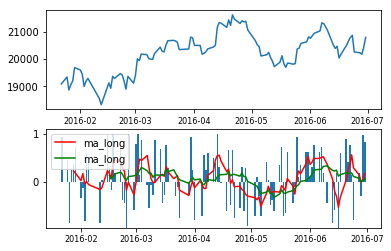

In [30]:
import matplotlib.pyplot as plt

result = result.dropna()


result['ADP_MAS'] = ta.abstract.MA(result, 5, price='ADP')
result['ADP_MAL'] = ta.abstract.MA(result, 15, price='ADP')

plt.subplot(2,1,1)
plt.plot(result.HSI)
plt.subplot(2,1,2)
plt.bar(result.index, result.ADP)

plt.plot(result.ADP_MAS, c='r', label ='ma_long')
plt.plot(result.ADP_MAL, c='g', label ='ma_long')
plt.legend(loc='upper left')

plt.show()

## 如何用市场宽度来编写策略？
当均线金叉（短期大于长期均线）时候买进，死叉（短期小于长期）时卖出。

In [26]:
buy_time=[]
buy_price=[]

sell_time=[]
sell_price=[]

data = result.dropna()
it = result.iterrows()
t0, p0 = next(it)
pos = 0

for t1, p1 in it:
    if p1.ADP_MAS > p1.ADP_MAL and p0.ADP_MAS < p0.ADP_MAL:
        buy_time.append(t1)
        buy_price.append(p1.HSI)
    elif p1.ADP_MAS < p1.ADP_MAL and p0.ADP_MAS > p0.ADP_MAL:
        sell_time.append(t1)
        sell_price.append(p1.HSI)
    t0, p0 = t1, p1

print 'buy_time:', buy_time
print 'buy_price', buy_price
print 'sell_time', sell_time
print 'sell_price', sell_price

buy_time: [Timestamp('2016-02-04 00:00:00'), Timestamp('2016-02-12 00:00:00'), Timestamp('2016-02-26 00:00:00'), Timestamp('2016-03-01 00:00:00'), Timestamp('2016-03-11 00:00:00'), Timestamp('2016-03-17 00:00:00'), Timestamp('2016-03-30 00:00:00'), Timestamp('2016-04-06 00:00:00'), Timestamp('2016-04-19 00:00:00'), Timestamp('2016-04-21 00:00:00'), Timestamp('2016-05-09 00:00:00'), Timestamp('2016-05-16 00:00:00'), Timestamp('2016-05-20 00:00:00'), Timestamp('2016-06-20 00:00:00'), Timestamp('2016-06-29 00:00:00')]
buy_price [19183.089843999998, 18319.580077999999, 19364.150390999999, 19407.460938, 20199.599609000001, 20503.810547000001, 20803.390625, 20206.669922000001, 21436.210938, 21622.25, 20156.810547000001, 19883.949218999998, 19852.199218999998, 20510.199218999998, 20436.119140999999]
sell_time [Timestamp('2016-02-03 00:00:00'), Timestamp('2016-02-11 00:00:00'), Timestamp('2016-02-24 00:00:00'), Timestamp('2016-02-29 00:00:00'), Timestamp('2016-03-08 00:00:00'), Timestamp('2016

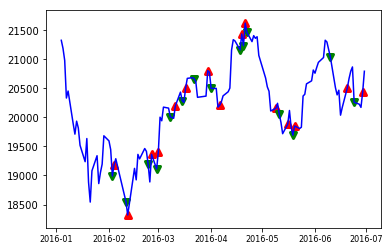

In [27]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
plt.plot(result['HSI'], c='b')
plt.scatter(buy_time, buy_price, c='r', marker='^', linewidths=3)
plt.scatter(sell_time, sell_price, c='g', marker='v', linewidths=3)
plt.show()

In [ ]:
import numpy as np
money = np.array(sell_price) - np.array(buy_price)
money = list(money)
money.insert(0,0)
money = np.array(money)
capital = money.cumsum()
plt.plot(capital)
plt.show()